In [1]:
import os
import sys
sys.path.insert(0, "../") # uncomment to work with local copy
import diffusive_solver as df
print(df.__version__)

3.0rc8


In [2]:
output_folder = 'testing_results/magnetotransport'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [3]:
from diffusive_solver import *

In [4]:
geometry = Geometry.from_points(points_coords =[[-3,1],[-3,0],[3,0],[3,1]], 
                                contacts_positions = [[0,1],[2,3]], 
                                resolution = 20)

In [5]:
sigma = 1.
sigma_H = 1.
L_00 = Matrix_Expression([[sigma,sigma_H],
                          [-sigma_H,sigma]], 
                         scalar = False, 
                         dimension = 2)
L = [[L_00]]

null_mat = Matrix_Expression(0, 
                             scalar = True, 
                             dimension = 1)
Gamma = [[null_mat]]
F = [null_mat]

In [6]:
problem = Problem(geometry = geometry,  
                  n_fields = 1,
                  self_adjoint = False,
                  L = L,
                  Gamma = Gamma,
                  contact_resistances = [[0.1, 0.1]],
                  biases = [[1.,0.]],
                  F = F)

In [7]:
problem.solve()
problem.compute_currents()
problem.save(output_folder)

In [8]:
print(problem.fluxes)
print(problem.response_matrix)
print(problem.source_vector)

[[-0.27568914  0.27570534]]
[[[[-0.27568914  0.27568914]]

  [[ 0.27570534 -0.27570534]]]]
[[0. 0.]]


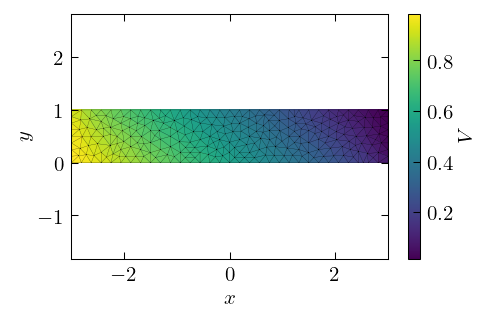

In [9]:
problem.plot_field(field = 0)
plt.axis('equal')
cb = plt.colorbar()
cb.set_label('$V$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig(output_folder + '/1a.pdf')

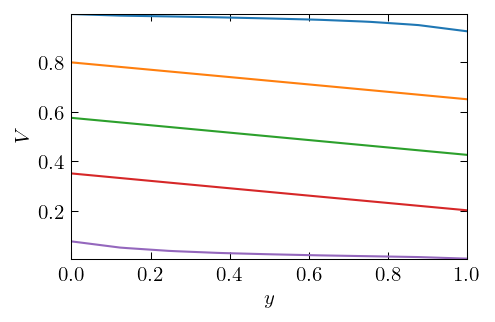

In [10]:
y= np.linspace(0,1)
for xi in np.linspace(-3,3,num=5):   
    plt.plot(y,[problem.fields[0](xi,yi) for yi in y])
plt.xlabel('$y$')
plt.ylabel('$V$')
plt.savefig(output_folder + '/1b.pdf')